In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

## 1.Первичный анализ данных в датасете

In [2]:
data = pd.read_csv('stud_math.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
data.rename(columns={'Pstatus': 'pstasus', 'Medu': 'medu',
                     'Fedu': 'fedu', 'Mjob': 'mjob',
                     'Fjob': 'fjob', 'studytime, granular': 'studytime_granular'}, inplace=True)

data.drop(['studytime_granular'], inplace=True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstasus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Мы видим, что многие столбцы имеют пропущенные значения. 
Сперва поработаем с числовым форматом данных и  попробуем заменить пропуски(Nan) на медианные значения в столбцах типа float64, int64.В данном случае я имею ввиду тип хранения данных и не рассматриваю хранимые признаки как числовые или категориальные. Использую терминологию сугубо для методов работы с данными

Но прежде попробуем отфильтровать каждый столбец и проверить его на выбросы.

## 2.Анализ данных числового типа в датасете

У нас следующие столбцы с числовыми данными:
2   age                 395 non-null    int64  
6   medu                392 non-null    float64
7   fedu                371 non-null    float64
12  traveltime          367 non-null    float64
13  studytime           388 non-null    float64
14  failures            373 non-null    float64
24  famrel              368 non-null    float64
25  freetime            384 non-null    float64
26  goout               387 non-null    float64
27  health              380 non-null    float64
28  absences            383 non-null    float64
29  score               389 non-null    float64

Как видим, в большинстве из них есть пропуски.Заменим их медианным значением для каждого столбца, кроме age, так как в нем нет пропусков

In [6]:
medu_median = data['medu'].median()
fedu_median = data['fedu'].median()
traveltime_median = data['traveltime'].median()
studytime_median = data['studytime'].median()
failures_median = data['failures'].median()
famrel_median = data['famrel'].median()
freetime_median = data['freetime'].median()
goout_median = data['goout'].median()
health_median = data['health'].median()
absences_median = data['absences'].median()
score_median = data['score'].median()


data.medu.fillna(medu_median, inplace=True)
data.fedu.fillna(fedu_median, inplace=True)
data.traveltime.fillna(traveltime_median, inplace=True)
data.studytime.fillna(studytime_median, inplace=True)
data.failures.fillna(failures_median, inplace=True)
data.famrel.fillna(famrel_median, inplace=True)
data.freetime.fillna(freetime_median, inplace=True)
data.goout.fillna(goout_median, inplace=True)
data.health.fillna(health_median, inplace=True)
data.absences.fillna(absences_median, inplace=True)
data.score.fillna(score_median, inplace=True)

## 3.Анализ данных числового типа на распределение значений и отсутствие выбросов

Теперь у нас все эти столбцы без пропусков, поэтому можем посмотреть распределние значений внутри них с помощью гистограммы.

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.751899,2.577215,1.407595,2.037975,0.318987,3.941772,3.225316,3.103797,3.549367,7.179747,52.303797
std,1.276043,1.094154,2.164782,0.678490,0.834580,0.726244,0.895081,0.980711,1.104610,1.372118,23.111967,22.746314
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.500000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


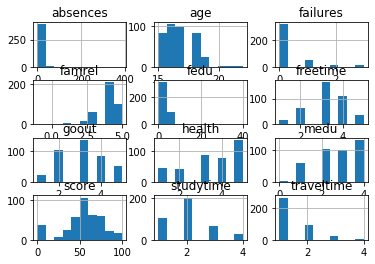

In [7]:
columns_digital = data[['age', 'medu', 'fedu', 'traveltime', 'studytime',
                        'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]
columns_digital.hist()
columns_digital.describe()

Как мы видим, в основном значения распределны между 16-18, поэтому для улучшения обучения модели можем отобрать средние значения.


Соответственно, пройдемся по каждому столбцу,что мы можем заметить на основе этих данных:
    age- выбросов нет.
    medu-значения распределены без выбросов, но возникает вопрос по части значений со значением 0, т.е. это женщины даже без начального образования. Непонятно, это ошибка в сборе данных или правда
    fedu- здесь видим выброс=40, скорее всего просто ошибка, поэтому просто заменим эти значения в выборке на 4 для улучшения качества данных Предварительно можно заметить, что качество образования отцов в среднем ниже, чем мтеринское.
    travel_time-здесь выбросов нет.
    studytime-здесь выбросов нет
    failures-выбросов тоже нет по здиапозону значений, но как мы можем заметить, наиболее частым значением является 0, который может говорить как об отсуствии негативного опывта у ученика, так и наоборот его изобилии. Из-за эой двусмысленности, предлагаю эти данные для дальнейшего анализа не использовать.
    famrel-есть выбросы в виде значений -1Б можем предположить, что имелось в виду 1. Попробуем тоже заменить выбросы на значение 1
    freetime-выбросов вроде нет
    goout-выбросов вроде нет
    health-выбросов нет
    abscences-есть явные выбросы, больше количества дней в году. Можно попробовать использовать средние значения для этого столбца в корреляционном анализе данных
    score-выбросов нет

    
    
    
    

In [8]:
# устранили выброс в fedu
data.fedu = data.fedu.apply(lambda x: 4 if x == 40 else x)
data.famrel = data.famrel.apply(
    lambda x: 1 if x == -1 else x)  # устранили выброс в famrel

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.751899,2.486076,1.407595,2.037975,0.318987,3.946835,3.225316,3.103797,3.549367,7.179747,52.303797
std,1.276043,1.094154,1.062362,0.678490,0.834580,0.726244,0.872425,0.980711,1.104610,1.372118,23.111967,22.746314
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.500000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


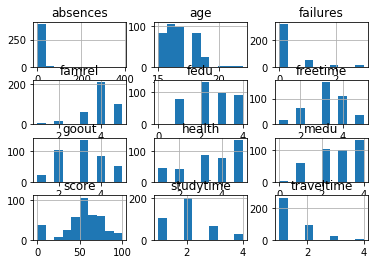

In [9]:
columns_digital = data[['age', 'medu', 'fedu', 'traveltime', 'studytime',
                        'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]
columns_digital.hist()
columns_digital.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


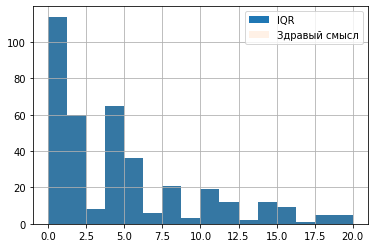

In [10]:
median = data.absences.median()
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
data.absences.loc[data.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 20),
                                                                                  label='IQR')
data.absences.loc[data.absences <= 100].hist(alpha=0.1, bins=16, range=(0, 20),
                                             label='Здравый смысл')
plt.legend()

In [11]:
#data = data.loc[data.absences <= 20]

Выше мы устранили выбросы для столбцов fedu и fsamrel, а для устранения выбросов в столбце применили фильтр с применением формылы интерквартильного расстояния, оставив те значения, которые не превышали верхнюю границу 

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.751899,2.486076,1.407595,2.037975,0.318987,3.946835,3.225316,3.103797,3.549367,7.179747,52.303797
std,1.276043,1.094154,1.062362,0.678490,0.834580,0.726244,0.872425,0.980711,1.104610,1.372118,23.111967,22.746314
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.500000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


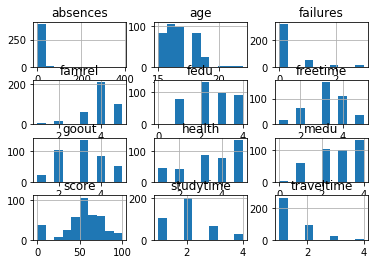

In [12]:
columns_digital = data[['age', 'medu', 'fedu', 'traveltime', 'studytime',
                        'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]
columns_digital.hist()
columns_digital.describe()

In [13]:
columns_digital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         395 non-null    int64  
 1   medu        395 non-null    float64
 2   fedu        395 non-null    float64
 3   traveltime  395 non-null    float64
 4   studytime   395 non-null    float64
 5   failures    395 non-null    float64
 6   famrel      395 non-null    float64
 7   freetime    395 non-null    float64
 8   goout       395 non-null    float64
 9   health      395 non-null    float64
 10  absences    395 non-null    float64
 11  score       395 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 37.2 KB


Как видим, у нас стало на 17 строк меньше в наших числовых данных, но зато теперь применение корреляционных метрик даст более прозрачный расчет.

## 4.Корреляционную матрицу  для данных числового типа

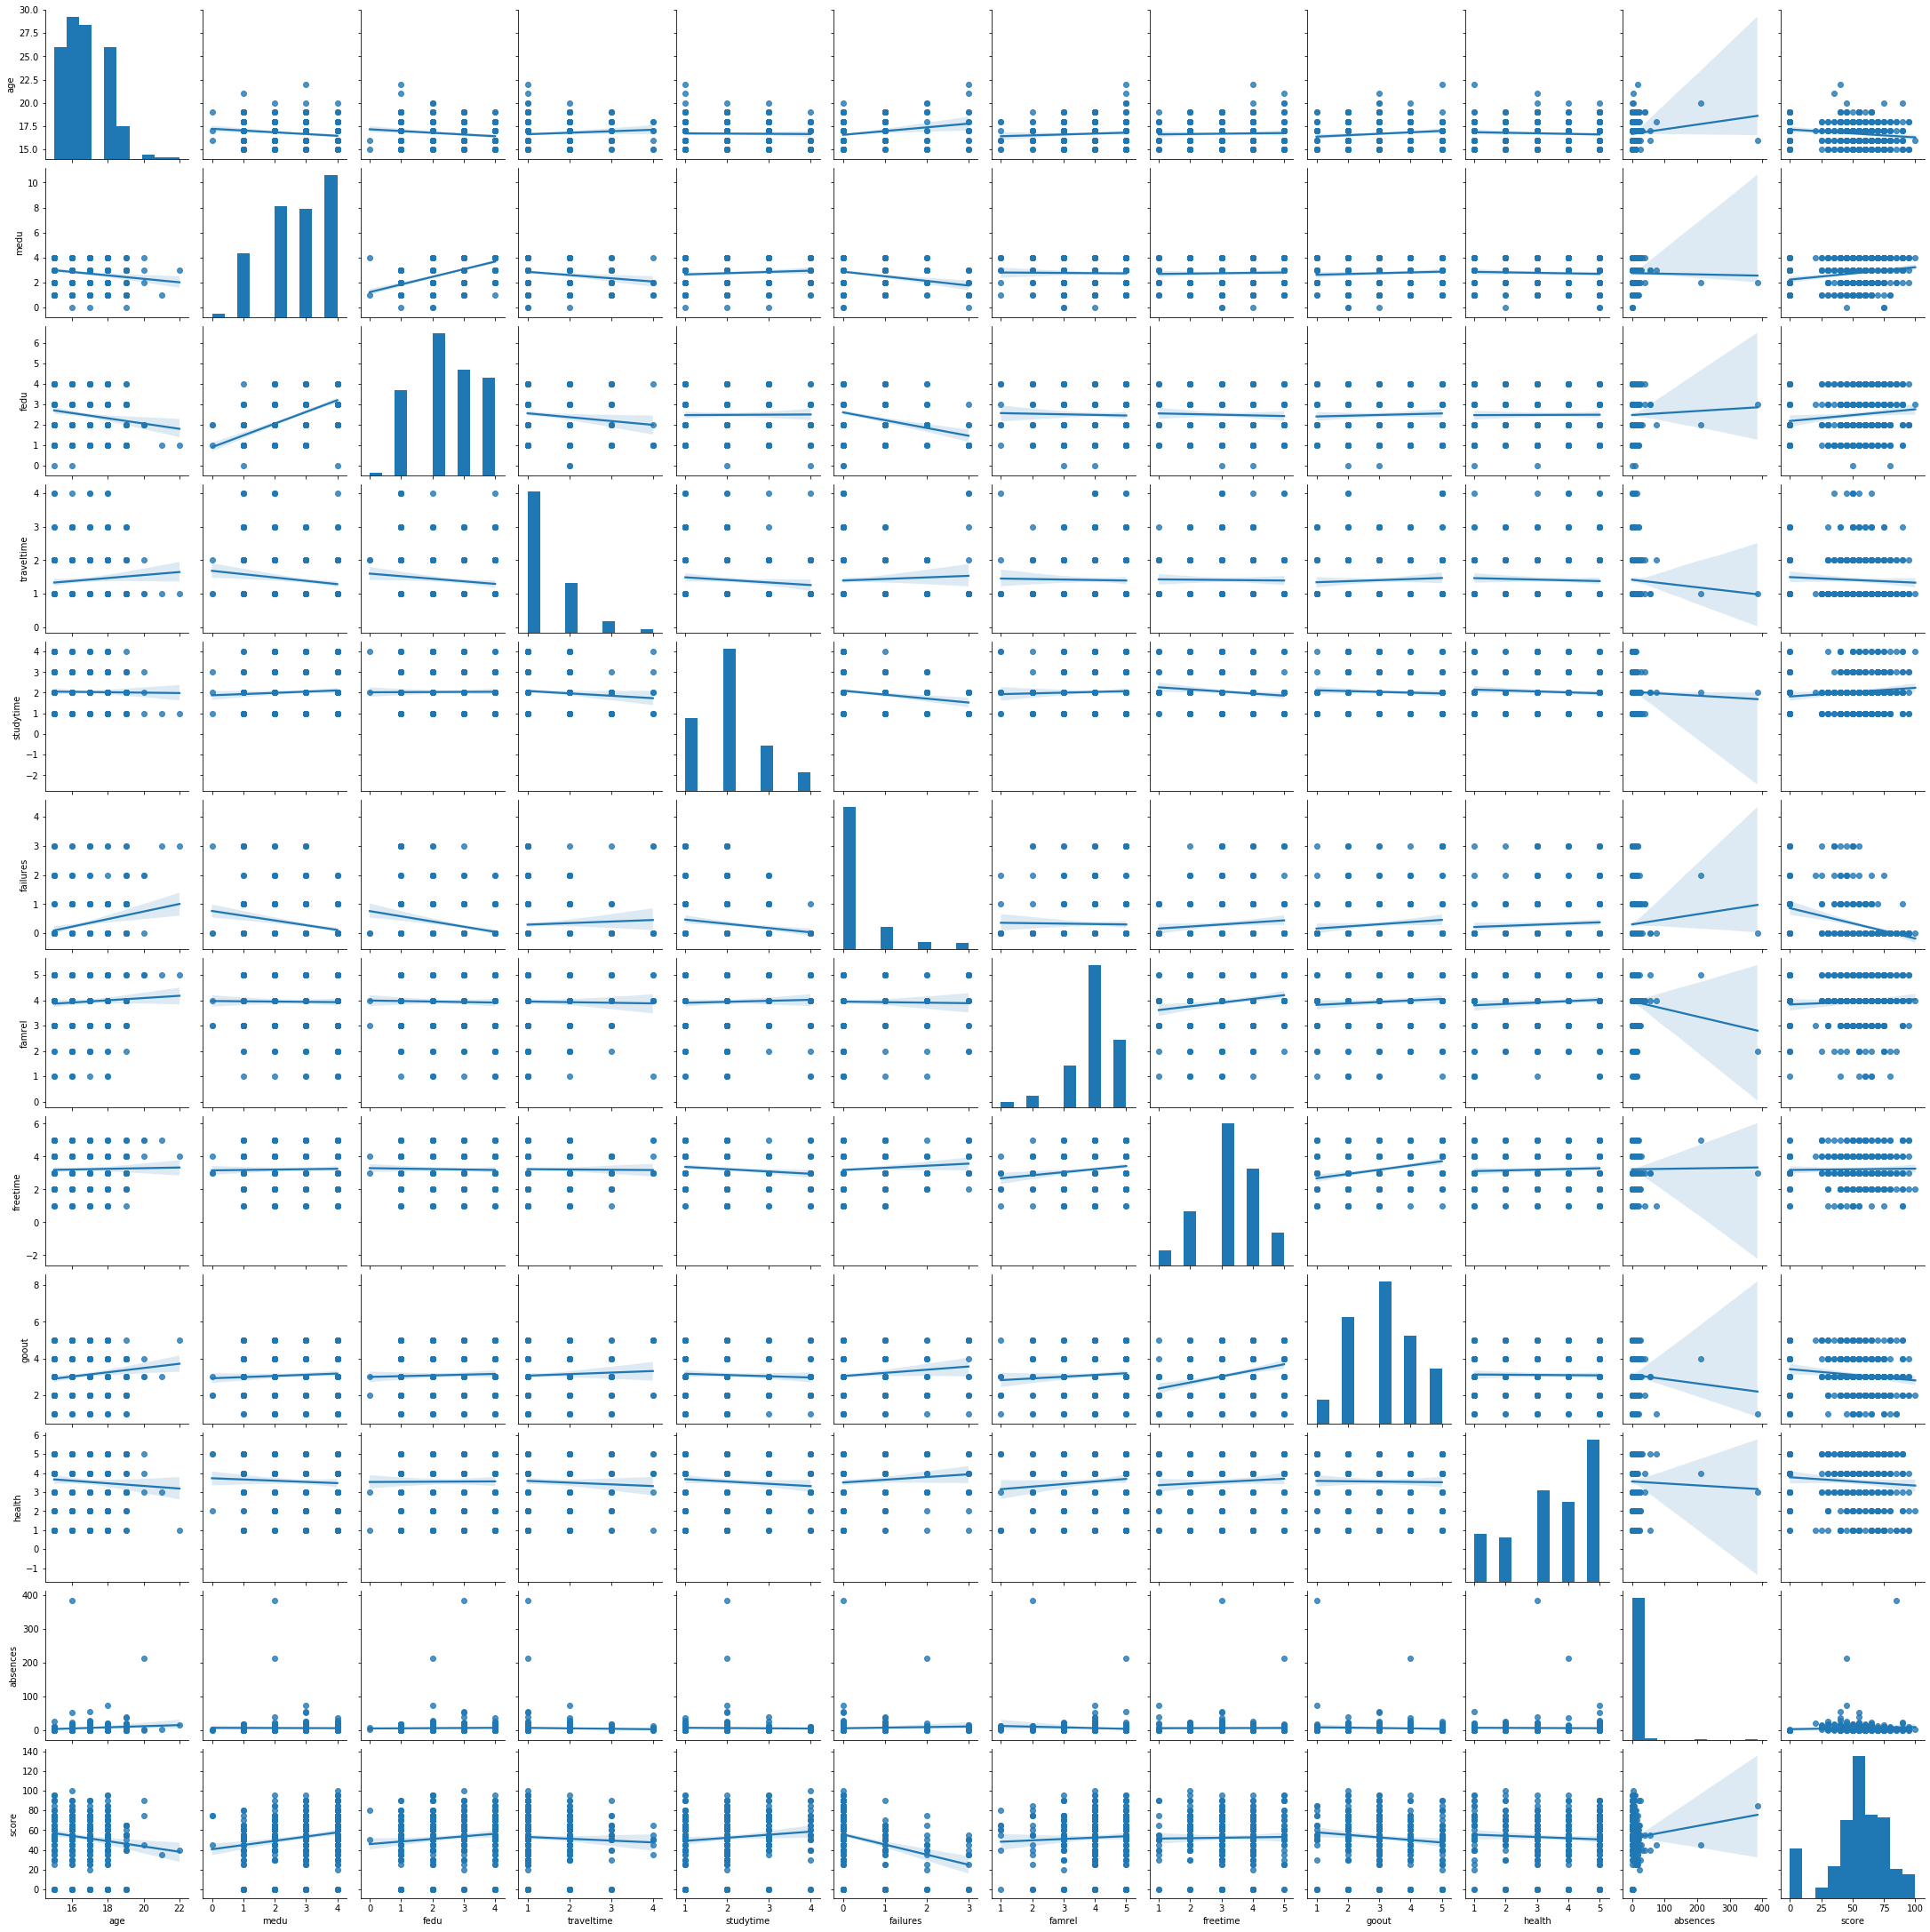

In [14]:
sns.pairplot(columns_digital, kind='reg')

In [15]:
columns_digital.corr()
columns_digital.corr().style.background_gradient(cmap='coolwarm')

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.154781,0.084755,-0.015355,0.228081,0.065250,0.026443,0.134069,-0.063892,0.091531,-0.151150
medu,-0.161375,1.000000,0.593116,-0.160877,0.077050,-0.245110,-0.013853,0.026210,0.063361,-0.050991,-0.010979,0.205568
fedu,-0.154781,0.593116,1.000000,-0.120629,0.007754,-0.260690,-0.024077,-0.029868,0.039084,0.006132,0.021345,0.122642
traveltime,0.084755,-0.160877,-0.120629,1.000000,-0.094637,0.049670,-0.019040,-0.012496,0.051775,-0.044842,-0.038511,-0.055243
studytime,-0.015355,0.077050,0.007754,-0.094637,1.000000,-0.166598,0.037638,-0.119014,-0.051090,-0.073674,-0.025619,0.114371
failures,0.228081,-0.245110,-0.260690,0.049670,-0.166598,1.000000,-0.017230,0.094826,0.113649,0.075849,0.055245,-0.326532
famrel,0.065250,-0.013853,-0.024077,-0.019040,0.037638,-0.017230,1.000000,0.165324,0.074217,0.085947,-0.079959,0.053510
freetime,0.026443,0.026210,-0.029868,-0.012496,-0.119014,0.094826,0.165324,1.000000,0.292305,0.060557,0.006943,0.018200
goout,0.134069,0.063361,0.039084,0.051775,-0.051090,0.113649,0.074217,0.292305,1.000000,-0.014274,-0.049745,-0.125708
health,-0.063892,-0.050991,0.006132,-0.044842,-0.073674,0.075849,0.085947,0.060557,-0.014274,1.000000,-0.017368,-0.072776



Можем установить уровень значимости на уровне a=0.1 для отбора параметров, рекомендованных к обучению модели
Корреляции параметра score:
значимая обратная корреляция наблюдается с параметрами age, failures, goout
Значимая прямая корреляция наблюдается с параметрами medu, fedu, studytime
Тогда можно рекомендовать оставить следующие параметры:
traveltime
famrel
freetime
health
abscences
Если задать уровень значимости на уровне a=0.05, то останется только freetime


Помимо этого можно обратить внимание на следующие моменты:
    сильная корреляция между парметрами fedu, medu, что позволяет сделать вывод,что родители учеников были примерно одного образовательного уровня, что в целом могло влиять на обучение и результаты ученика
    сильная обратная корреляция между failures /fedu/medu-чем ниже образовательный уровень родителей, тем больше неудач у ученика
    и чем меньше тратит ученик на учебу, тем больше риск внеучебных неудач
    обратная зависимость между freetime и studytime- чем больше ученик учится вне школы, тем меньше у него свободного времени
    чем ниже уровень образования родителей, тем больше времени на дорогу до школы тратит ученик
    уровень семейных отношений связан с количеством свободного времени после школы
    количество свободного времени тесно связано с количеством  времени на друзей
    
    

## 5.Анализ данных  типа object, выявление пропусков

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstasus     350 non-null    object 
 6   medu        395 non-null    float64
 7   fedu        395 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Рассмотрим следующие столбцы:
school,sex,address,famsize,pstasus,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic    

In [17]:
object_columns = data[['school', 'sex', 'address', 'famsize', 'pstasus', 'mjob', 'fjob', 'reason',
                       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]
for column in object_columns:
    print(object_columns[column].value_counts())

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
U    295
R     83
Name: address, dtype: int64
GT3    261
LE3    107
Name: famsize, dtype: int64
T    314
A     36
Name: pstasus, dtype: int64
other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64
other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
mother    250
father     86
other      28
Name: guardian, dtype: int64
no     335
yes     51
Name: schoolsup, dtype: int64
yes    219
no     137
Name: famsup, dtype: int64
no     200
yes    155
Name: paid, dtype: int64
yes    195
no     186
Name: activities, dtype: int64
yes    300
no      79
Name: nursery, dtype: int64
yes    356
no      19
Name: higher, dtype: int64
yes    305
no      56
Name: internet, dtype: int64
no     240
yes    124
Name: romantic, 

Что на основе этого мы можем заметить:

-пропуски есть в следующих столбцах:
address,famsize,pstasus,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic   
Особенно много их в pstasus, fjob, guardian, famsup, paid, internet, romantic.
-типы школ представлены крайне неравномерно(school)
-большинство учеников из города
-размер семьи в основном меньше 3, в основном живут вместе
-не специфицирована информация о том, в какой сфере работают родители, для отца в половине случаев, для матери-в треть
-так же крацйне неравномерно представлены вариации ответов в столбцах nursery, higher, internet. Сомнтиельно, что для данных столбцов получить оценку о влиянии на score.

На самом деле все данные, описанные здесь как тип object, можно было бы переписать в int. Так как тоже представлены в основном категорийные данные, которые хорошо шифруются цифрами

## 6.Анализ номинативных переменных

In [18]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=data.loc[data.loc[:, column].isin(
                    data.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

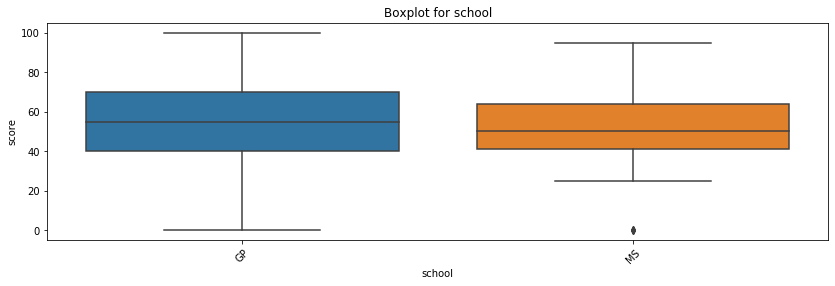

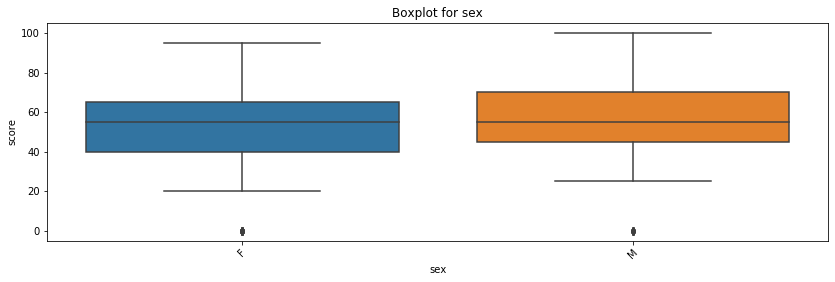

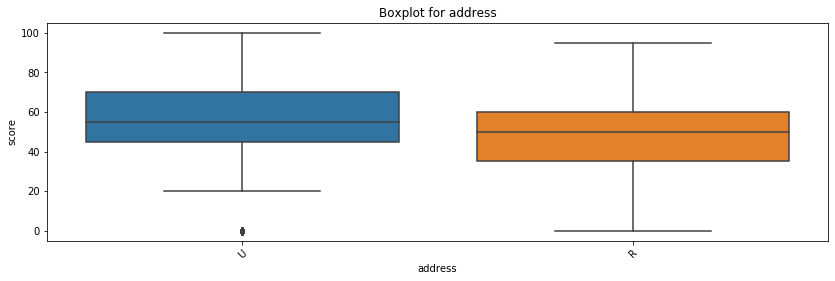

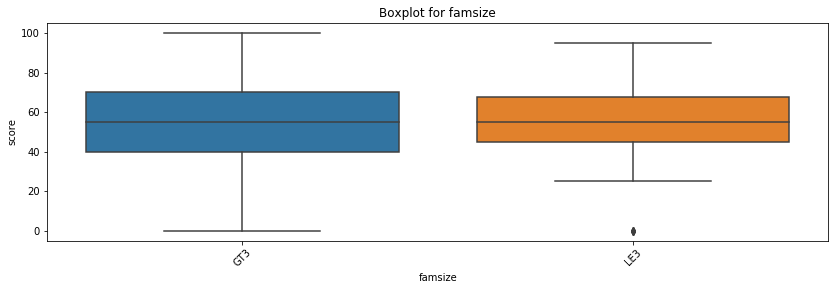

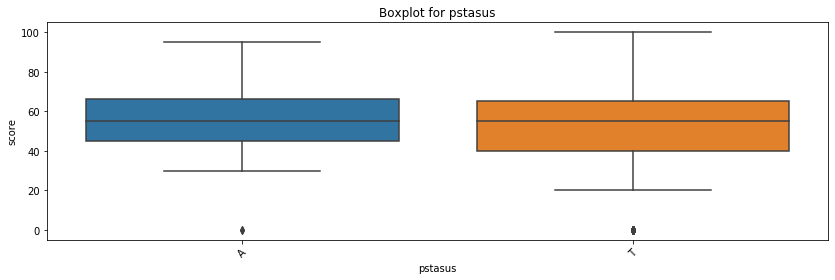

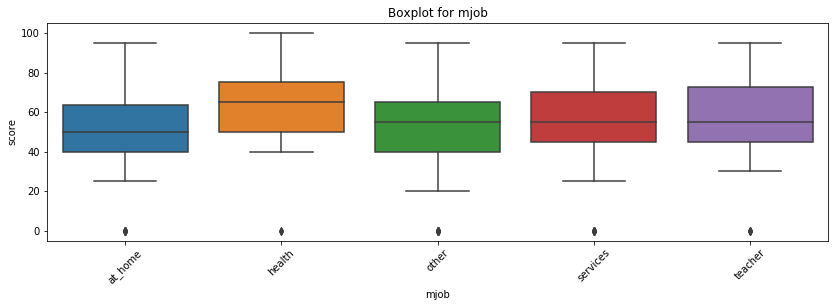

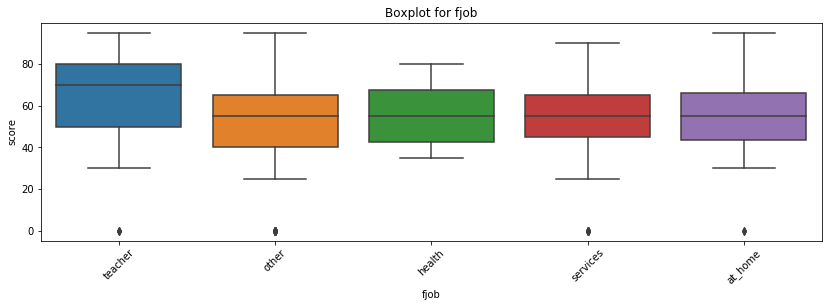

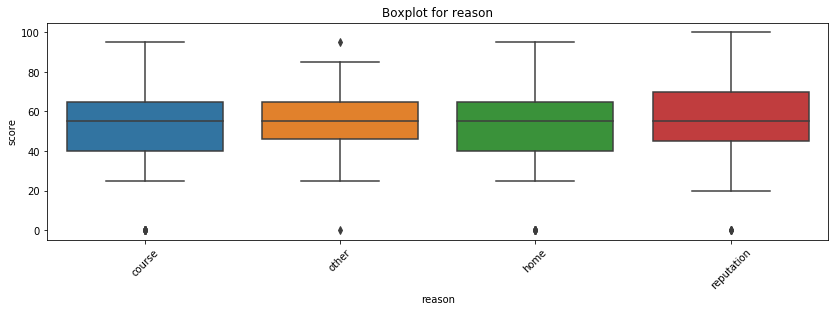

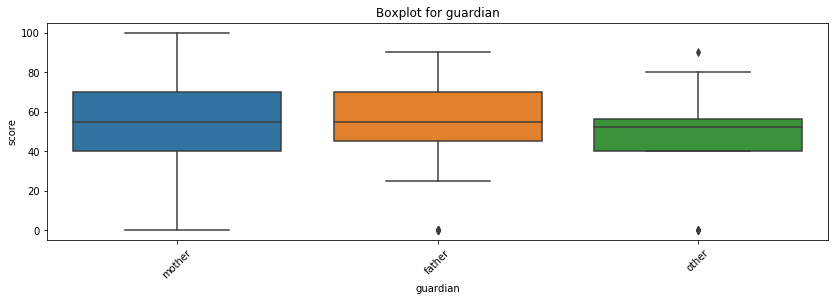

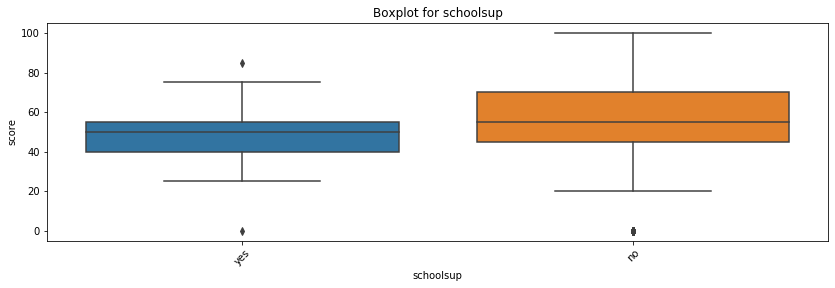

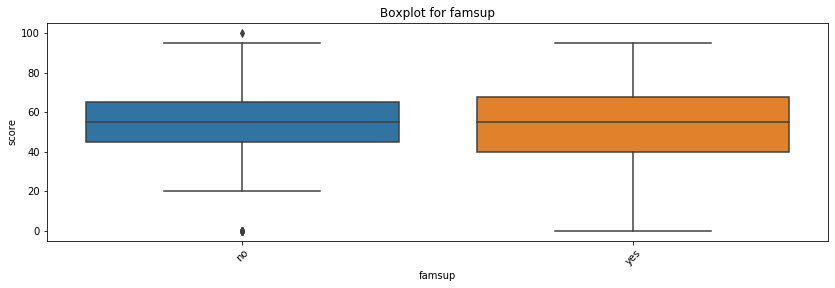

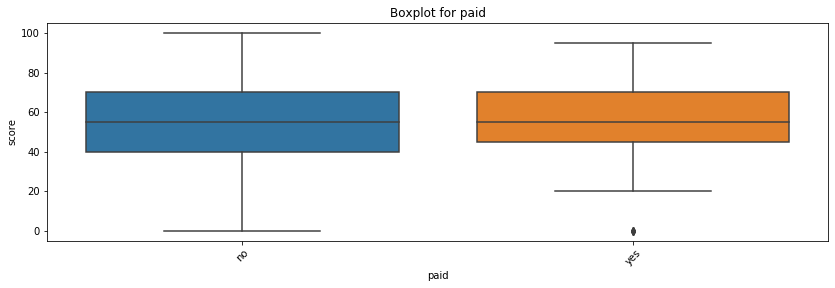

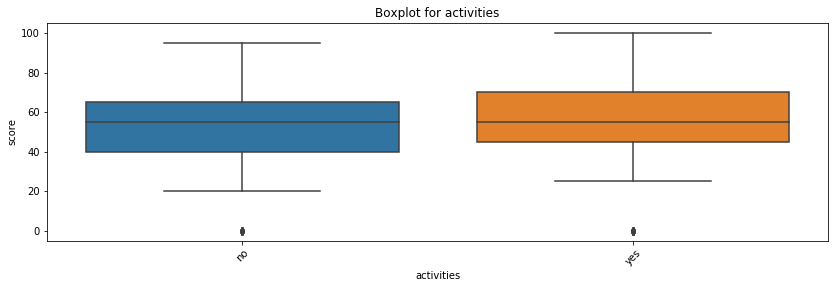

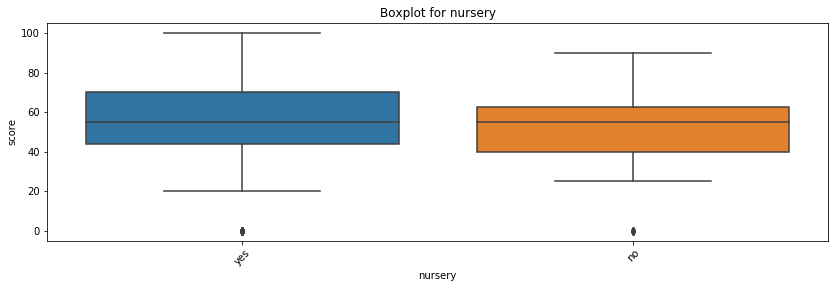

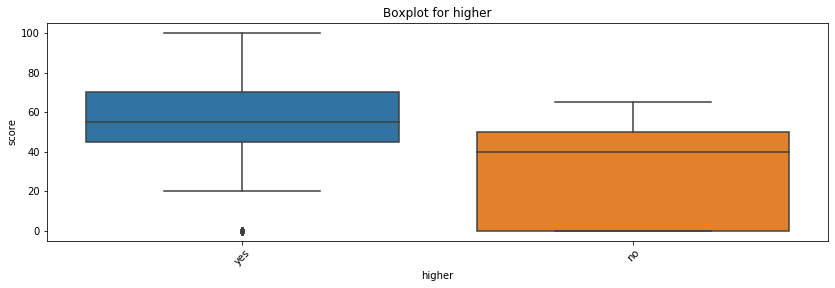

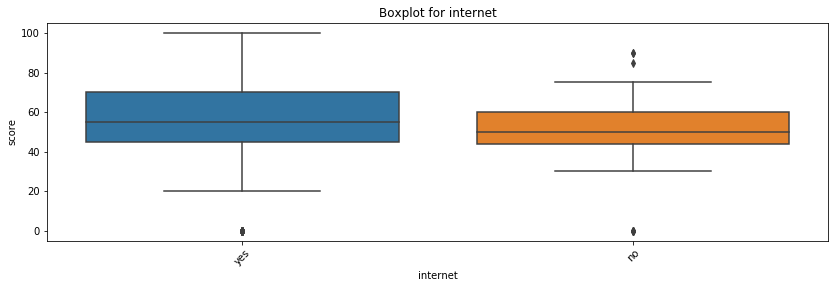

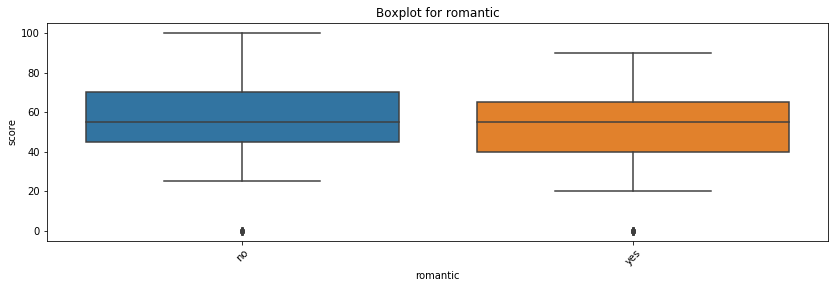

In [19]:
for col in object_columns:
    get_boxplot(col)

In [20]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in object_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Для дальнейшего использования в обучении машинной модели отобраны параметры sex,Address,mjob,schoolsup,paid,higher,romantic.Уровень значимости 0.1 выбран для большего разнообразия рекомендуемых параметров.Так как со стандартным 0.05 получается совсем мало параметров. Плюс по боксплотам заметно, что в принципе с использованием уровня значимости 0.1 картина получается похожей, в том числе разное распределение значений параметров, квартилей и медианы в отобранных параметрах в зависимости от категории внутри параметра(на боксплотах)

# ИТОГО

In [21]:
data_for_model = data[['sex', 'address', 'mjob', 'schoolsup', 'paid', 'higher',
                       'romantic', 'traveltime', 'famrel', 'freetime', 'health', 'absences']]
data_for_model.head()

,sex,address,mjob,schoolsup,paid,higher,romantic,traveltime,famrel,freetime,health,absences
0,F,U,at_home,yes,no,yes,no,2.0,4.0,3.0,3.0,6.0
1,F,U,at_home,no,no,yes,no,1.0,5.0,3.0,3.0,4.0
2,F,U,at_home,yes,NaN,yes,NaN,1.0,4.0,3.0,3.0,10.0
3,F,U,health,no,yes,yes,yes,1.0,3.0,2.0,5.0,2.0
4,F,U,other,no,yes,yes,no,1.0,4.0,3.0,5.0,4.0


Для обучения модели машинного обучения отобраны параметры 'sex', 'address', 'mjob', 'schoolsup', 'paid', 'higher',
                       'romantic', 'traveltime', 'famrel', 'freetime', 'health', 'absences'